Name: JOEL RAJU

Batch: R1

Date: 08-04-2023

Experiment Name: 5.1. GAN - MNIST data generation

Experiment Description: The experiment aims at designing a GAN model for generating MNIST
data.


**Dataset**

---



The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a
number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).


In [ ]:
 import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Generative Adversarial Networks**

We have one real picture.
And we have a counterfeiter who paints fake pictures.
The real picture and the fake picture go to the detective.

**Generator Training**

Let me explain this a little bit more narratively. At first the generator will produce a picture that
does not look like the real picture because the room does not know what it is producing and will
label the picture it produces, so it will say that this is the real picture and send it to the detective.
The detective will say you couldn’t fool me it’s not real and send it back. This pattern generator,
experiment by experiment, will now produce a picture that is very similar to the real picture and
will deceive the detective. In this way, a new data will be produced.


Load and Check Data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/DNN/mnist_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DNN/mnist_test.csv")

In [ ]:
print("Train Shape --> ",train_data.shape)
print("Test Shape --> ",test_data.shape)

Train Shape -->  (60000, 785)
Test Shape -->  (10000, 785)


In [ ]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 	 # Train Data value counts # 
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


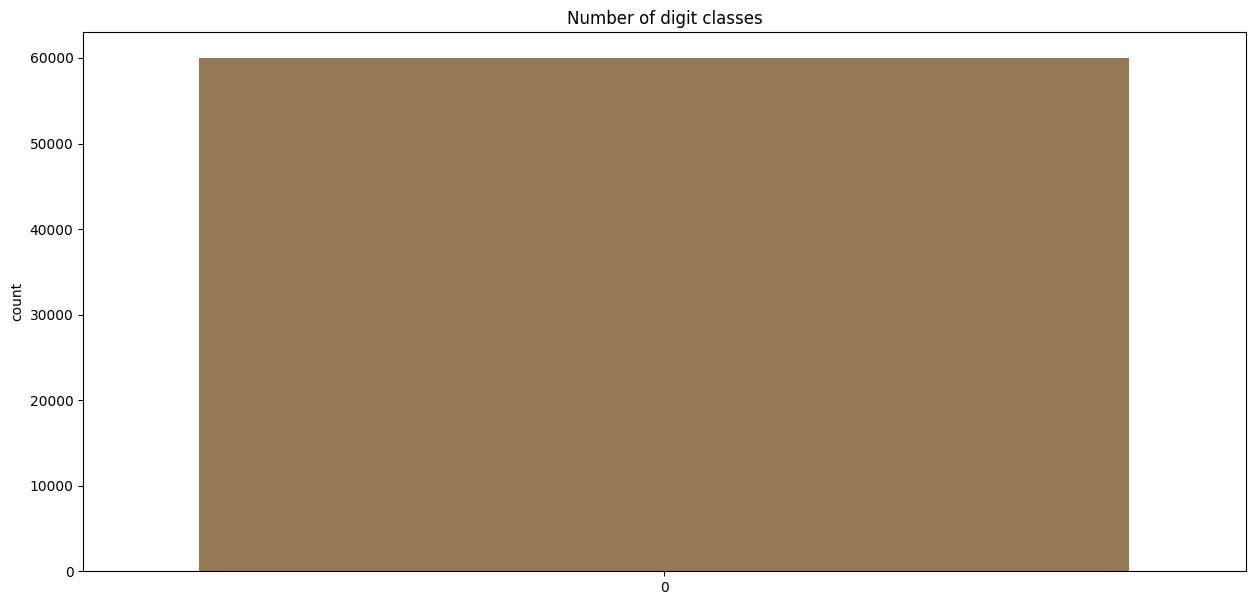

In [ ]:
# how many of which numbers are there?
plt.figure(figsize=(15,7))
g = sns.countplot(train_data["label"], palette="cubehelix")
plt.title("Number of digit classes")
print(" \t # Train Data value counts # \n",train_data["label"].value_counts())

**Train -Test Split**

In [ ]:
 X_train = train_data.drop(["label"], axis = 1).values
y_train = train_data.label.values
X_test = test_data.drop(["label"], axis = 1).values
y_test = test_data.label.values

In [ ]:
print("X_train shape --> ",X_train.shape)
print("y_train shape --> ",y_train.shape)
print("X_test shape --> ",X_test.shape)
print("y_test shape --> ",y_test.shape)

X_train shape -->  (60000, 784)
y_train shape -->  (60000,)
X_test shape -->  (10000, 784)
y_test shape -->  (10000,)


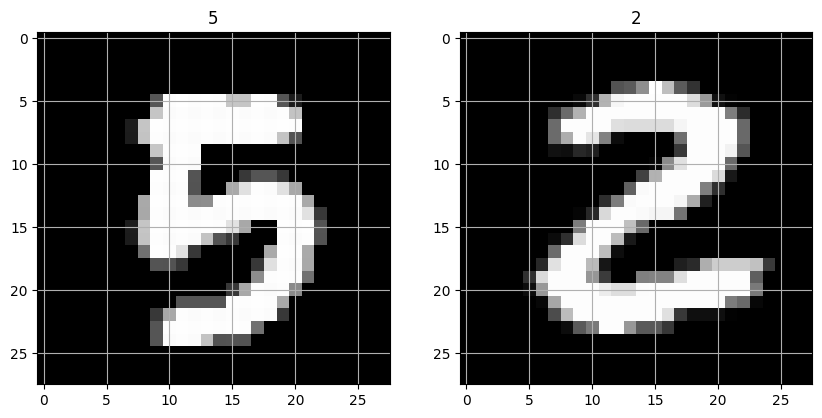

In [ ]:
plt.figure(figsize=(10,8))
img = X_train[244]
img = img.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[244,0])
plt.grid()
img1 = X_train[25]
img1 = img1.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title(train_data.iloc[25,0])
plt.grid()
plt.show()

**Normalization**

If we do not normalize, there may be errors due to certain colors. So, we first need to normalize.
Images are represented by values between 0 and 255.

In [ ]:
 X_train = (X_train.astype(np.float32)-127.5)/127.5
print("X_train Shape --> ",X_train.shape)

X_train Shape -->  (60000, 784)


X_train Shape --> (60000, 784)

Different models may require different input shapes.
Our input type for this model is (60000, 784).

**Implemention with Keras**

**Import Model Library**

We will import the libraries we will use for our GANs model

In [ ]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Sequential, Model
#from keras.optimizers import adam_v2

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

**Creating Generator**

In [ ]:
generator = Sequential()
generator.add(Dense(units = 512, input_dim = 100))
generator.add(ReLU())
generator.add(Dense(units = 512))
generator.add(ReLU())
generator.add(Dense(units = 1024))
generator.add(ReLU())

We create our generator model. Below we will add an output layer to our model.

**Generator Output**

Since our image size is 784 here, our output will be this shape. As a result, we produce an image.

In [ ]:
 generator.add(Dense(units = 784, activation = "tanh"))

**Generator Compile**

Yes, now we need to compile our model.

optimizer –> The optimizer does the process of updating our parameters for us here. some kind
of healer I can say. There are methods used for multiple optimizers, and you should choose the
most suitable one for the model.

In [ ]:
generator.compile(loss = "binary_crossentropy",
optimizer =Adam(learning_rate = 0.0001, beta_1 = 0.5))

**Generator Summary**

In [ ]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               51712     
                                                                 
 re_lu_3 (ReLU)              (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_4 (ReLU)              (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_5 (ReLU)              (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 784)              

____________________________________________________________
**Creating Discriminator**

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(units = 1024, input_dim = 784))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))
discriminator.add(Dense(units = 512))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))
discriminator.add(Dense(units = 256))
discriminator.add(ReLU())

**Discriminator Output**

we created our detective model above. Here we will create the output part of it

In [ ]:
discriminator.add(Dense(units = 1, activation = "sigmoid"))

**Discriminator Compile**

In [ ]:
discriminator.compile(loss = "binary_crossentropy",
optimizer = Adam(learning_rate = 0.0001, beta_1 = 0.5))

**Discriminator Summary**

We take a look at the discriminator model we created.

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              803840    
                                                                 
 re_lu_6 (ReLU)              (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 re_lu_7 (ReLU)              (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

_______________________________________________________________
**Create GAN**

we will combine these two to createGANs model.

In [ ]:
discriminator.trainable = False
gan_input = Input(shape = (100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs = gan_input, outputs = gan_output)
gan.compile(loss = "binary_crossentropy", optimizer = "adam")

**GANs Summary**

Yes, now that we’ve built our GANs model, we can take a look at it

In [ ]:
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_1 (Sequential)   (None, 784)               1643280   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


**Epochs and Batch Size**

Epochs : the forward and backward processing of data one by one. In other words, we can simply
call it a complete educational tour. Education is determined by the number of eras.


In [ ]:
epochs = 50
batch_size = 256

**Training the model**

In [ ]:
for e in range(epochs):
    for _ in range(batch_size):
        """
         Yes, we first generate noise to give it to the generator.
         The generator will try to generate us a new image using it.
        """
        noise = np.random.normal(0,1, [batch_size, 100])
        """
         We give the noise we have produced above to my generator.
         We have already produced this generator above. This will produce us an
         image as output
        """
        generated_images = generator.predict(noise)
        """
         we produced our fake pictures above. It's time to choose our real
         pictures. We will do this here.
        """
        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)]
        """
        We combine our two data to send it to the discriminator.
        """
        x = np.concatenate([image_batch, generated_images])
        """
        Yes, we got our pictures but they don't have tags. Here we add tags to
        your images.
        Real Images --> 1
        Generated Images --> 0
        """
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        """
        Now we can train the discriminator.
        We set it to True to train the discriminator. Because we closed it above.
        inputs --> x (real image, fake image)
        """
        discriminator.trainable = True
        discriminator.train_on_batch(x,y_dis)
        """
        generated training.
        Generated Images --> 1
        Here why we showed fake pictures as 1.
        Because we want to deceive the discriminator. This will make him more␣
        ,→successful.
        """
        noise = np.random.normal(0,1, [batch_size,100])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)
print("epochs: ",e)

Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 3ms/step
epochs:  49


4/4 [==============================] - 0s 3ms/step


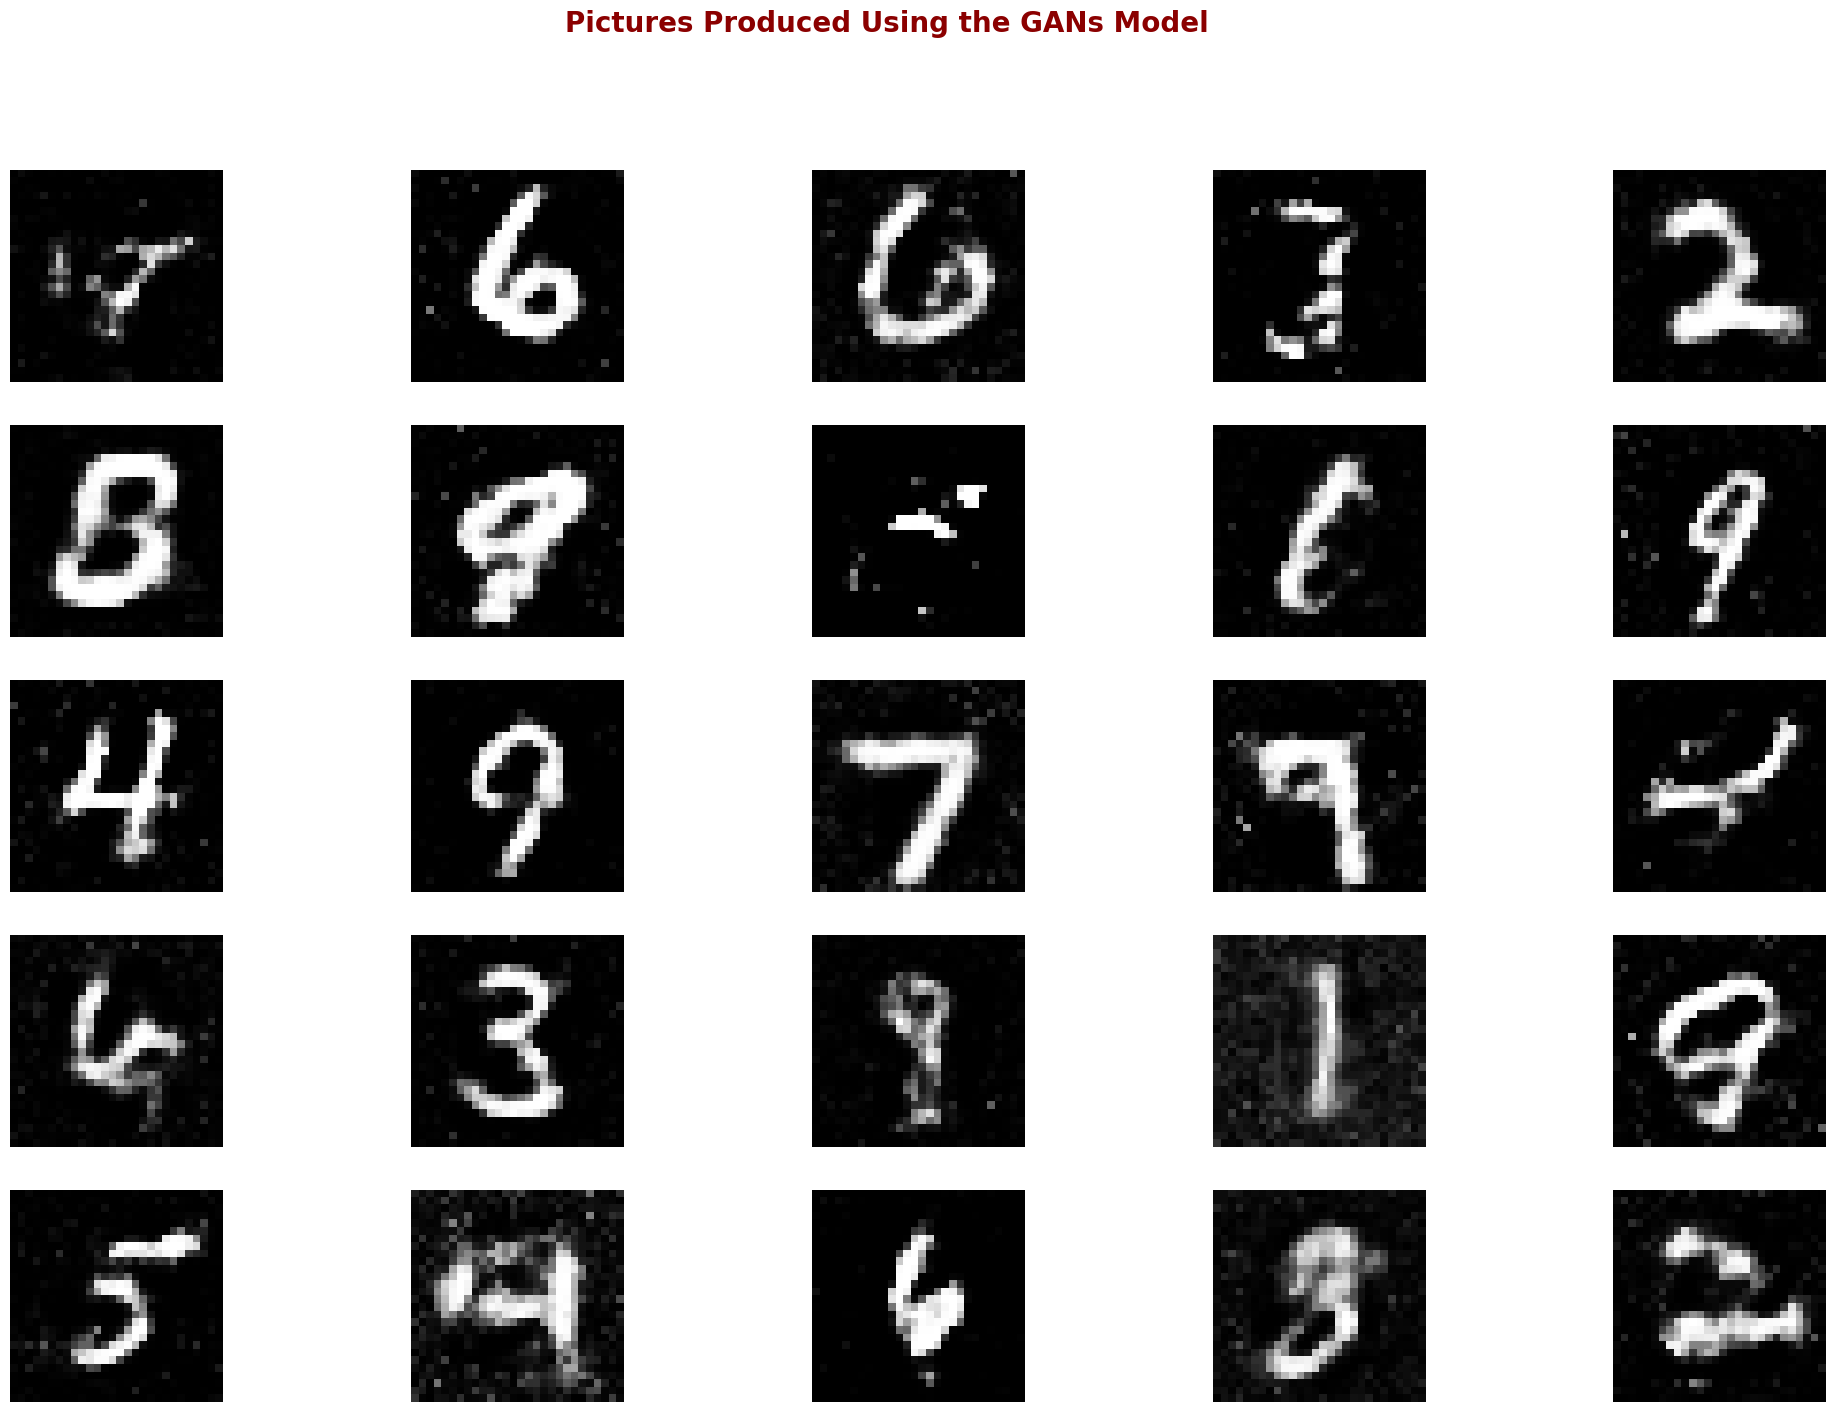

In [ ]:
plt.figure(figsize=(25,16))
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = generator.predict(noise)
generated_images = generated_images.reshape(100,28,28)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(generated_images[i], interpolation='nearest', cmap = "gray")
  plt.axis('off')
plt.suptitle("Pictures Produced Using the GANs Model", fontsize = 20 , color ="darkred", fontweight = 'bold')
plt.show()

**Result**

Even though it’s a 50 epochs model, the model produced pretty good pictures. There are pictures
that are pretty close to the real things. Thus a GAN model was modelled, trained and evaluated
for MNIST data generation.